<i>STATUS: Draft<i>

In [1]:
import sympy as sp
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
import csv
import datetime
import os
import random
import math

<hr/>
<i>"Hierarchical Temporal Memory is a foundational technology for the future of machine intelligence based upon the biology of the neocortex" <br/> --Numenta website</i>

--numenta.org
<hr/>

HTM is a novel approach to Machine Intelligence that seeks to understand and build systems that are based on the architecture of the neocortex. The purpose of these notebooks is to demonstrate through both how HTM works by walking through how it can be implemented, and also how to use htm.core for projects, which is a mature code-base that runs HTM algorithms.  

As we go forward, its important to note that the study of machine intelligence via HTM tends to get a bit interdisciplinary: its somewhere between Neuroscience, Computer Science, Machine Learning, Mathematics and Statistics. Its rare to know all these fields deeply, and this can make it a little difficult and when you are learning this stuff: you tend to run into implicit assumptions about what you may know in various fields. I will try and get around this by building up these ideas slowly and carefully. Where we run into issues in medical neuroscience, I will point out handy resoures to help, or provide a seperate notebook for concepts in maths and stats. It does take time to get across HTM but its well worth it. 

### Resources

If you are keen to follow along, there are a couple of handy resources you should be aware of: 

* Join the HTM Forum at: https://discourse.numenta.org/t/error-installing-htm-core/8459 . You might find alot of topic threads that don't make alot of sense at first, but over time they will, and this is a highly supportive community in which you can ask questions and seek help. 
* Watch the Matt Taylor HTM school videos which provide an amazing introduction into HTM, found at: https://numenta.org/htm-school/ or on YouTube at https://www.youtube.com/watch?v=XMB0ri4qgwc&list=PL3yXMgtrZmDqhsFQzwUC9V8MeeVOQ7eZ9. I will use these videos as a way to structure things and will take you through them also, but watching them will give you a sense of where it is all heading. On this YouTube channel there are also lots of other playlists and videos and I will point you towards different ones as we go forward
* Check out https://numenta.com/resources/biological-and-machine-intelligence/ a white paper style write up of how it all works. This will get complicated quickly and we will work through it but it will be a great resource as we go through. It also has lots of links to great papers that will we will use. 
* One the strictly neuroscience side of things, there are so many resources out there that it sometimes seems hard to know where to start. For me, the bes resources have been https://www.youtube.com/channel/UCKvdc-wq9yUL9unCgX2vvzg, a YouTube channel called <i>Brains Explained</i> which packs a huge amount of information into short, well made clips, that you can almost view as study notes. The other great resource for me is the Neuroscience textbook from D. Purves, https://www.amazon.com.au/Neuroscience-Dale-Purves/dp/1605353809/ref=asc_df_1605353809/?tag=googleshopdsk-22&linkCode=df0&hvadid=347664591317&hvpos=&hvnetw=g&hvrand=16894287221776705978&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9071750&hvtargid=pla-385433663671&psc=1 This text is really a first year university type of tome, but gives you the context you need to get across the Neuroscience. It's a bit of an investment, however tracking down an early edition is quite easy. Even if you work through an earlier edition of this text it will be fine for our needs.


Finally, if you are coming from the Machine Learning point of view, its important to realise that HTM takes quite a different approach to Machine Learning. In Machine learning, the goal is often to iterate through some kind of dataset to with the view to finding some kind of rule that explains accounts for the data. There are all kind of ways of doing this, but what Machine Learning really comes down to is how quickly you can iterate through data to establish some rule. Along the way in Machine Learning, data is often manipulated through various methods in Linear Algebra, s from calculus, and using statistical measures to establish whether its fit for puprose. The problem is one of computation, how to move quickly enough through a data set to some predictive task. There are an awful lot of algorithms, but they usually ome down to creative of applying these basic ideas. 

There is no doubt that Machine Learning is very powerful technique. It allows building structures, that can approximate, prediction. But it quite different from our the brain processes, stores and reasons about information. 

The means a number of things. Finding. Also forgetting. The human brain  approaches in a different way. Rather than try and find a rule for a given data set whether it be supervised or unsupervised, it sets out to understand and build systems based on the principles of the human neocortex. 

#### Getting things set up: 

Before we do anything else, let's focus on downloading the HTM code base and getting it running. Note that to do this, you will need Administrative rights to install software on your computer (because you will need to install Docker). 

By way of context, Numenta created its implemntation of HTM in a code base that is no longer actively maintained. It was created in Python 2.7 and is not heavily used now. As it was open sourced from the outset, there are a number of community implementation of the code in a number of diffrent languages. These implementatins all have varying degrees of maturity. We will follow this tradition to an extent in building up an implementation to explore how it all works, but we will end up switching over to the htm.core implementation, arguably the most popular and stable, which can be found at https://github.com/htm-community/htm.

The steps to install htm.core aref below, and this will get an enviroment up and running we can work in. Assuming you have nothing set up, this will take a bout 5-10 minutes, most from the time to take compiling the Python code from the C++ code. 

1. Install Docker on your machine by following the instructions at: https://www.docker.com/. 

2. Open a shell/bash terminal on your machine. Run:<br/>
<code>docker run -p 10000:8888 -e JUPYTER_ENABLE_LAB=yes --user root -v [location_you_want_to_keep_your_files_in]:/home/jovyan/work jupyter/datascience-notebook:33add21fab64</code>
Remember to just replace [location_you_want_to_keep_your_files_in] with the absolute path where you are keeping your files. The -v command above just tells Docker that the container will be able to see and save files to some folder on your local machine that you specify. Wherever that is, go there and run pwd and include that in the above docker run command.

3. Docker will download the jupyter notebook container and run it (further details of the image you are downloading can also be found at: https://jupyter-docker-stacks.readthedocs.io/en/latest/using/selecting.html. Once it has finished, it will provide some logs of a link that you can start your notebook. Note that the link it provides will say it should be running on port 8888. However, when you paste in the link, change the `8888` to `10000` as in the `docker run` command we have told Docker to reroute traffic on port 8888 of the container to port 10000 of our local machine

4. Note can can CTRL-c in the shell and it won't actually shut down the container (you can check with the command <code>docker container ls</code> and it will show the container running. 

5. Now, still using the shell on your local machine and now go into the docker container’s bash shell by running:<br/> <code>docker exec -it [docker container ID] bash</code><br/>
Note you can get the ID of the Docker Container from running: <cde>docker container ls</code>

6. Now you will be in the Docker container as the root user root. From here, just run two comands: <br/>
<code>apt-get update</code><br/>
<code>apt-get install cmake</code>

7. Now, while you are still in the container's shell run:<br/>
<code>git clone https://github.com/htm-community/htm </code>. This will clone the htm.core repo into the docker container. You will notice it downloads to the <code>\home</code> folder in the Docker container which has been synced with your local folder you created with that <code>-v command</code>, so the cloned repo will appear in your local machine folder as well

7. Once its downloaded, just follow the instructions at https://github.com/htm-community/htm.core for the Python installation. This will involve cd’ing into the htm.core folder and running <code>python setup.py install</code>. Note that I have ommitted the flaggs <code>--user</code> and <code>--force</code>. This is because this image is based on an anaconda installation and these flags will prevent the htm package from registering in conda's site packages.

8. You can also compile the C++ code and the docs by following the instructions on the htm.core github repo.
You should end up with everything installed, and when you go to localhost:1000 that Docker has spun up for you, you can check by things are ok by copying code from https://github.com/htm-community/htm.core/blob/master/py/htm/examples/hotgym.py into a notebook. Don't forget that when you go to the <code>http://127.0.0.1:10000/lab/tree/</code> for the first time it might ask for a token, which you can get from the command in which you ran at step 2 of these instructions, (or just run <code>docker container [CONTAINER ID] logs</code> to get this.

9. Finally, note you can `docker container stop [container-id]` and `docker container start [container-id]` at any time to shut down the container, and it should come back to life if exactly the same way. You can also push an image of this container to DockerHub to keep a copy of the setup safe

Ok, now let's just check everything works, using the the classic example from HTM, which examines power consumption in a gym. This example (code at: <a href="https://github.com/htm-community/htm.core/blob/master/py/htm/examples/hotgym.py">https://github.com/htm-community/htm.core/blob/master/py/htm/examples/hotgym.py</a> 

Don't worry that it does not make alot of sense now. The main thing here is just to check things work. First, install the relevant libraries:

In [2]:
from htm.bindings.sdr import SDR, Metrics
from htm.encoders.rdse import RDSE, RDSE_Parameters
from htm.encoders.date import DateEncoder
from htm.bindings.algorithms import SpatialPooler
from htm.bindings.algorithms import TemporalMemory
from htm.algorithms.anomaly_likelihood import AnomalyLikelihood 
from htm.bindings.algorithms import Predictor

Get the fileapth to the data:

In [6]:
_INPUT_FILE_PATH = "../HTMNotebooks/data/gymdata.csv"

Create a dictionary of parameters we will pass to the Encoder, Spatial Pooler, and Temporal Memory:

In [7]:
default_parameters = {
  # there are 2 (3) encoders: "value" (RDSE) & "time" (DateTime weekend, timeOfDay)
 'enc': {
      "value" :
         {'resolution': 0.88, 'size': 700, 'sparsity': 0.02},
      "time": 
         {'timeOfDay': (30, 1), 'weekend': 21}
 },
 'predictor': {'sdrc_alpha': 0.1},
 'sp': {'boostStrength': 3.0,
        'columnCount': 1638,
        'localAreaDensity': 0.04395604395604396,
        'potentialPct': 0.85,
        'synPermActiveInc': 0.04,
        'synPermConnected': 0.13999999999999999,
        'synPermInactiveDec': 0.006},
 'tm': {'activationThreshold': 17,
        'cellsPerColumn': 13,
        'initialPerm': 0.21,
        'maxSegmentsPerCell': 128,
        'maxSynapsesPerSegment': 64,
        'minThreshold': 10,
        'newSynapseCount': 32,
        'permanenceDec': 0.1,
        'permanenceInc': 0.1},
 'anomaly': {
   'likelihood': 
       {#'learningPeriod': int(math.floor(self.probationaryPeriod / 2.0)),
        #'probationaryPeriod': self.probationaryPeriod-default_parameters["anomaly"]["likelihood"]["learningPeriod"],
        'probationaryPct': 0.1,
        'reestimationPeriod': 100} #These settings are copied from NAB
 }
}


Now let's read in the data: 

In [8]:
records = []
with open(_INPUT_FILE_PATH, "r") as fin:
    reader = csv.reader(fin)
    headers = next(reader)
    next(reader)
    next(reader)

    for record in reader:
        records.append(record)


Create the date encoder, and RDSE encoder:

In [9]:
parameters = default_parameters
dateEncoder = DateEncoder(timeOfDay= parameters["enc"]["time"]["timeOfDay"], 
                          weekend  = parameters["enc"]["time"]["weekend"]) 

In [10]:
scalarEncoderParams = RDSE_Parameters()
scalarEncoderParams.size = parameters["enc"]["value"]["size"]
scalarEncoderParams.sparsity = parameters["enc"]["value"]["sparsity"]
scalarEncoderParams.resolution = parameters["enc"]["value"]["resolution"]
scalarEncoder = RDSE( scalarEncoderParams )
encodingWidth = (dateEncoder.size + scalarEncoder.size)
enc_info = Metrics( [encodingWidth], 999999999 )

Now build the Spatial Pooler: 

In [11]:
spParams = parameters["sp"]
sp = SpatialPooler(
            inputDimensions            = (encodingWidth,),
            columnDimensions           = (spParams["columnCount"],),
            potentialPct               = spParams["potentialPct"],
            potentialRadius            = encodingWidth,
            globalInhibition           = True,
            localAreaDensity           = spParams["localAreaDensity"],
            synPermInactiveDec         = spParams["synPermInactiveDec"],
            synPermActiveInc           = spParams["synPermActiveInc"],
            synPermConnected           = spParams["synPermConnected"],
            boostStrength              = spParams["boostStrength"],
            wrapAround                 = True
)
sp_info = Metrics( sp.getColumnDimensions(), 999999999 )

And the temporal memory:

In [12]:
tmParams = parameters["tm"]
tm = TemporalMemory(
            columnDimensions          = (spParams["columnCount"],),
            cellsPerColumn            = tmParams["cellsPerColumn"],
            activationThreshold       = tmParams["activationThreshold"],
            initialPermanence         = tmParams["initialPerm"],
            connectedPermanence       = spParams["synPermConnected"],
            minThreshold              = tmParams["minThreshold"],
            maxNewSynapseCount        = tmParams["newSynapseCount"],
            permanenceIncrement       = tmParams["permanenceInc"],
            permanenceDecrement       = tmParams["permanenceDec"],
            predictedSegmentDecrement = 0.0,
            maxSegmentsPerCell        = tmParams["maxSegmentsPerCell"],
            maxSynapsesPerSegment     = tmParams["maxSynapsesPerSegment"]
)
tm_info = Metrics( [tm.numberOfCells()], 999999999 )

Now get some prediction information about how well our model predicts things: 

In [13]:
anParams = parameters["anomaly"]["likelihood"]
probationaryPeriod = int(math.floor(float(anParams["probationaryPct"])*len(records)))
learningPeriod     = int(math.floor(probationaryPeriod / 2.0))
anomaly_history = AnomalyLikelihood(learningPeriod= learningPeriod,
                                  estimationSamples= probationaryPeriod - learningPeriod,
                                  reestimationPeriod= anParams["reestimationPeriod"])

predictor = Predictor( steps=[1, 5], alpha=parameters["predictor"]['sdrc_alpha'] )
predictor_resolution = 1

In [14]:
  inputs      = []
  anomaly     = []
  anomalyProb = []
  predictions = {1: [], 5: []}
  for count, record in enumerate(records):

    # Convert date string into Python date object.
    dateString = datetime.datetime.strptime(record[0], "%m/%d/%y %H:%M")
    # Convert data value string into float.
    consumption = float(record[1])
    inputs.append( consumption )

    # Call the encoders to create bit representations for each value.  These are SDR objects.
    dateBits        = dateEncoder.encode(dateString)
    consumptionBits = scalarEncoder.encode(consumption)

    # Concatenate all these encodings into one large encoding for Spatial Pooling.
    encoding = SDR( encodingWidth ).concatenate([consumptionBits, dateBits])
    enc_info.addData( encoding )

    # Create an SDR to represent active columns, This will be populated by the
    # compute method below. It must have the same dimensions as the Spatial Pooler.
    activeColumns = SDR( sp.getColumnDimensions() )

    # Execute Spatial Pooling algorithm over input space.
    sp.compute(encoding, True, activeColumns)
    sp_info.addData( activeColumns )

    # Execute Temporal Memory algorithm over active mini-columns.
    tm.compute(activeColumns, learn=True)
    tm_info.addData( tm.getActiveCells().flatten() )

    # Predict what will happen, and then train the predictor based on what just happened.
    pdf = predictor.infer( tm.getActiveCells() )
    for n in (1, 5):
      if pdf[n]:
        predictions[n].append( np.argmax( pdf[n] ) * predictor_resolution )
      else:
        predictions[n].append(float('nan'))

    anomalyLikelihood = anomaly_history.anomalyProbability( consumption, tm.anomaly )
    anomaly.append( tm.anomaly )
    anomalyProb.append( anomalyLikelihood )

    predictor.learn(count, tm.getActiveCells(), int(consumption / predictor_resolution))


Print out a summary:

In [15]:
print("Encoded Input", enc_info)
print("")
print("Spatial Pooler Mini-Columns", sp_info)
print(str(sp))
print("")
print("Temporal Memory Cells", tm_info)
print(str(tm))
print("")

Encoded Input SDR( 1462 )
    Sparsity Min/Mean/Std/Max 0.0437757 / 0.044305 / 0.000286134 / 0.0444596
    Activation Frequency Min/Mean/Std/Max 0 / 0.0443047 / 0.0972678 / 0.685265
    Entropy 0.693224
    Overlap Min/Mean/Std/Max 0 / 0.442158 / 0.0863436 / 0.538462

Spatial Pooler Mini-Columns SDR( 1638 )
    Sparsity Min/Mean/Std/Max 0.043956 / 0.0439559 / 2.08729e-07 / 0.043956
    Activation Frequency Min/Mean/Std/Max 0 / 0.0439561 / 0.0251675 / 0.0992941
    Entropy 0.939083
    Overlap Min/Mean/Std/Max 0 / 0.0763129 / 0.0419344 / 0.263889
Spatial Pooler Connections:
    Inputs (1462) ~> Outputs (1638) via Segments (1638)
    Segments on Cell Min/Mean/Max 1 / 1 / 1
    Potential Synapses on Segment Min/Mean/Max 1243 / 1243 / 1243
    Connected Synapses on Segment Min/Mean/Max 74 / 214.41 / 669
    Synapses Dead (0.724778%) Saturated (0.0338644%)
    Synapses pruned (0%) Segments pruned (0%)
    Buffer for destroyed synapses: 0    Buffer for destroyed segments: 0


Temporal Memory

Calculate the error of our model:

In [16]:
  for n_steps, pred_list in predictions.items():
    for x in range(n_steps):
        pred_list.insert(0, float('nan'))
        pred_list.pop()

  # Calculate the predictive accuracy, Root-Mean-Squared
  accuracy         = {1: 0, 5: 0}
  accuracy_samples = {1: 0, 5: 0}

  for idx, inp in enumerate(inputs):
    for n in predictions: # For each [N]umber of time steps ahead which was predicted.
      val = predictions[n][ idx ]
      if not math.isnan(val):
        accuracy[n] += (inp - val) ** 2
        accuracy_samples[n] += 1
  for n in sorted(predictions):
    accuracy[n] = (accuracy[n] / accuracy_samples[n]) ** .5
    print("Predictive Error (RMS)", n, "steps ahead:", accuracy[n])

  # Show info about the anomaly (mean & std)
  print("Anomaly Mean", np.mean(anomaly))
  print("Anomaly Std ", np.std(anomaly))

Predictive Error (RMS) 1 steps ahead: 8.194307893874706
Predictive Error (RMS) 5 steps ahead: 8.924496967264977
Anomaly Mean 0.038149371305856015
Anomaly Std  0.14909818905362276


Plot the results:

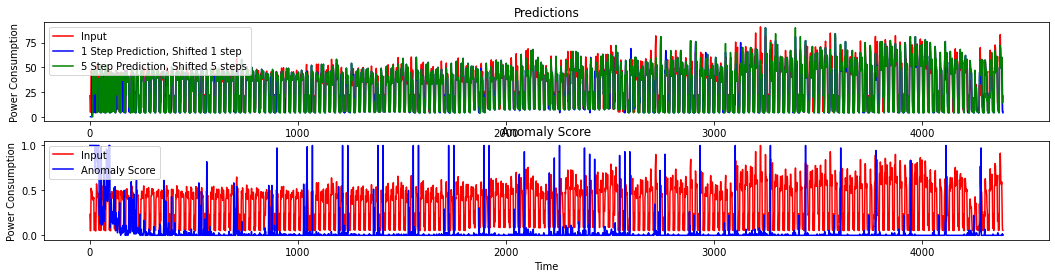

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 4))


ax1.set_title("Predictions")
ax1.set_xlabel("Time")
ax1.set_ylabel("Power Consumption")
ax1.plot(np.arange(len(inputs)), inputs, 'red',
         np.arange(len(inputs)), predictions[1], 'blue',
         np.arange(len(inputs)), predictions[5], 'green',)
ax1.legend(labels=('Input', '1 Step Prediction, Shifted 1 step', '5 Step Prediction, Shifted 5 steps'))

ax2.set_title("Anomaly Score")
ax2.set_xlabel("Time")
ax2.set_ylabel("Power Consumption")
inputs = np.array(inputs) / max(inputs)
plt.plot(np.arange(len(inputs)), inputs, 'red',
         np.arange(len(inputs)), anomaly, 'blue',)
plt.legend(labels=('Input', 'Anomaly Score'))
plt.show()

Alot of that will not really make sense. Don't worry for now, we will go through it all step be step